In [2]:
import gym, gym_unbalanced_disk, time
import numpy as np
from stable_baselines3 import PPO, SAC
import matplotlib.pyplot as plt

In [10]:
def normalise_angle(theta):
    return ((theta)%(2*np.pi))+np.pi

In [13]:
def compute_reward(self):
        abs_q=abs(normalise_angle(self.th))
        abs_dq=abs(self.omega)

        # reward
        r = lambda q_, dq_: -(q_**2 + 0.01*dq_**2)
        if abs_q<np.pi*2/3:
            reward= r(abs_q,abs_dq)
        else:
            reward= r(np.pi*2/3,4)-1.0*(4.0-abs_dq)**2

        return reward

In [14]:
target_angle=np.pi
reward_fun = lambda self: (np.cos(self.th - target_angle)+1)**2  - np.cos(self.th-(np.pi+target_angle)) - 0.1 *(self.omega)**2 - 0.001*(self.u)**2 # mediocre
reward_fun = lambda self: np.exp(-(self.th%(2*np.pi)-np.pi)**2/(2*(np.pi/7)**2)) #example reward function, change this! Okay
reward_fun=lambda self: -((self.th%(2*np.pi)-np.pi)**2 + 0.5 * self.omega**2)
reward_fun=lambda self: -(normalise_angle(self.th)**2 + 0.1 * self.omega**2 + 0.001 * self.u**2)
reward_fun =  lambda self: ((np.cos(self.th-target_angle)+1.5)*2 - 0.25) + 0.00125*(((np.cos(self.th)+1)/2)*(self.omega)**2) - 0.01*((self.u)**2)
# reward_fun = lambda self: ((self.th%np.pi)**2 +.1*self.omega**2 + .001*(self.u**2))
reward_fun = lambda self: compute_reward(self)


env = gym.make('unbalanced-disk-v0', dt=0.025, umax=3., reward_fun=reward_fun) 

model = PPO('MlpPolicy', env, verbose=1) #b)
# model = SAC('MlpPolicy', env, verbose=2, learning_starts=1000) #b)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [15]:
model.learn(total_timesteps=100_000)

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 300       |
|    ep_rew_mean     | -4.22e+03 |
| time/              |           |
|    fps             | 183       |
|    iterations      | 1         |
|    time_elapsed    | 11        |
|    total_timesteps | 2048      |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300          |
|    ep_rew_mean          | -4.01e+03    |
| time/                   |              |
|    fps                  | 172          |
|    iterations           | 2            |
|    time_elapsed         | 23           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0065037333 |
|    clip_fraction        | 0.0749       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | 5.32e-05     |
|    

In [21]:
# model.save('test_save2')

In [16]:
obs = env.reset()
thetas=[]
omegas=[]
rewards=[]
try:
    for _ in range(1000):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        env.render()
        thetas.append(obs[0])
        omegas.append(obs[1])
        rewards.append(reward)
        time.sleep(1/50)
        if done:
            obs=env.reset()
finally:
    env.close()

KeyboardInterrupt: 

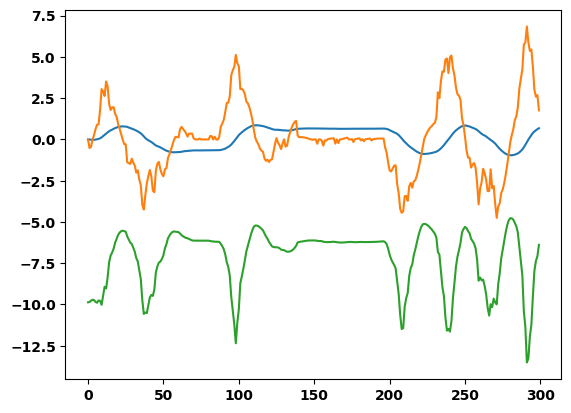

In [ ]:
plt.plot(thetas)
plt.plot(omegas)
plt.plot(rewards)

In [ ]:
obs = env.reset()
thetas=[]
windup_time=15
us=np.array([3]*windup_time + [-3]*(1000-windup_time))*(-1)
try:
    for i in range(1000):
        obs, reward, done, info = env.step(us[i])
        thetas.append(obs[0])
        env.render()
        time.sleep(1/50)
        if done:
            env.reset()
finally:
    env.close()


KeyboardInterrupt: 